# Analysis of stock prices in different time periods


**NOTE:** `base date point` means that base value will be set to the first date in dataset.

Example: if we want to get daily prices within a week then `base date point` means that the base value will be set **only** for data point with first date

In [1]:
import sys

sys.path.append('..')

from analysis_base_first_date import Column
from common import plot, YahooRange

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot


FILENAME = "sp500/sp500.csv"
LIMIT = None

logger.remove()
logger.add(sys.stdout, level="INFO")

pass

## Monthly stock price fluctuations within a year

In [2]:
from analysis_base_first_date import get_best_month

df = get_best_month(FILENAME, YahooRange.YEARS_10, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2011,1,MHK,100.0
1,2011,2,MHK,97.123051
2,2011,3,MHK,101.039859
3,2011,4,MHK,107.036391
4,2011,5,MHK,104.592717
...,...,...,...,...
57757,2020,8,EXPD,153.140878
57758,2020,9,EXPD,161.111102
57759,2020,10,EXPD,165.432098
57760,2020,11,EXPD,162.835874


       Percent (mean)
month                
1          223.354403
2          206.098218
3          207.601802
4          203.939867
5          210.127517


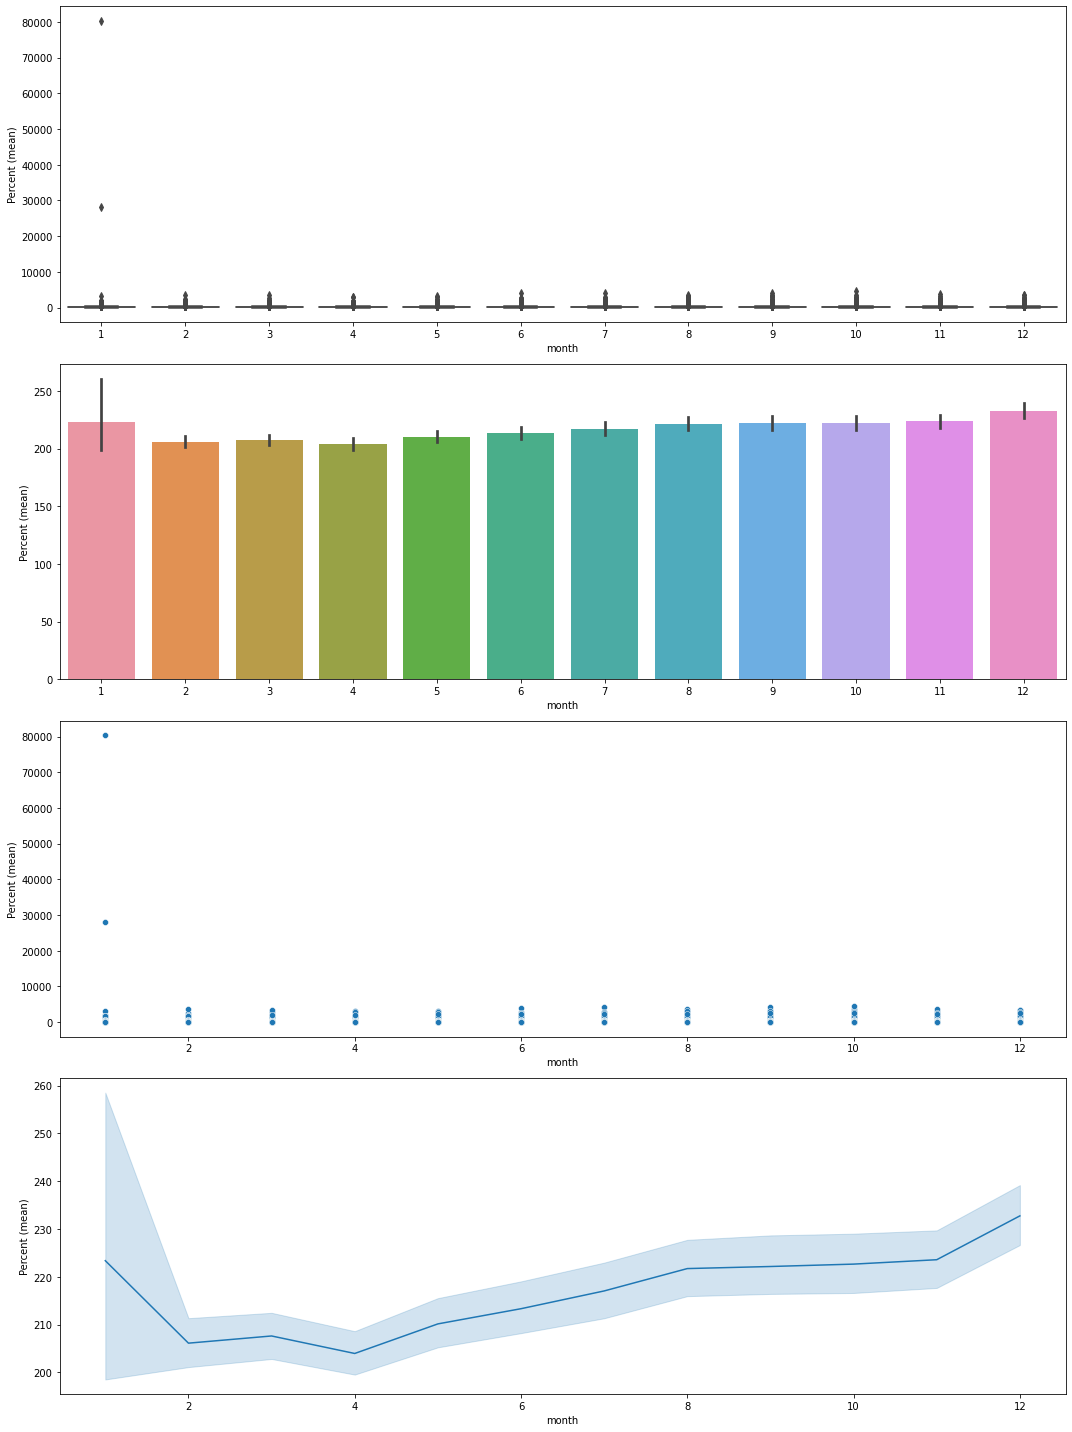

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Weekly stock price fluctuations within a year

In [4]:
from analysis_base_first_date import get_best_week

df = get_best_week(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2014,16,PAYC,100.0
1,2014,17,PAYC,92.681567
2,2014,18,PAYC,86.201121
3,2014,19,PAYC,87.653631
4,2014,20,PAYC,82.290502
...,...,...,...,...
251188,2020,49,NRG,167.573116
251189,2020,50,NRG,177.116474
251190,2020,51,NRG,172.498714
251191,2020,52,NRG,170.856848


      Percent (mean)
week                
1         209.317289
2          202.84061
3         226.910719
4         210.328463
5         207.183201


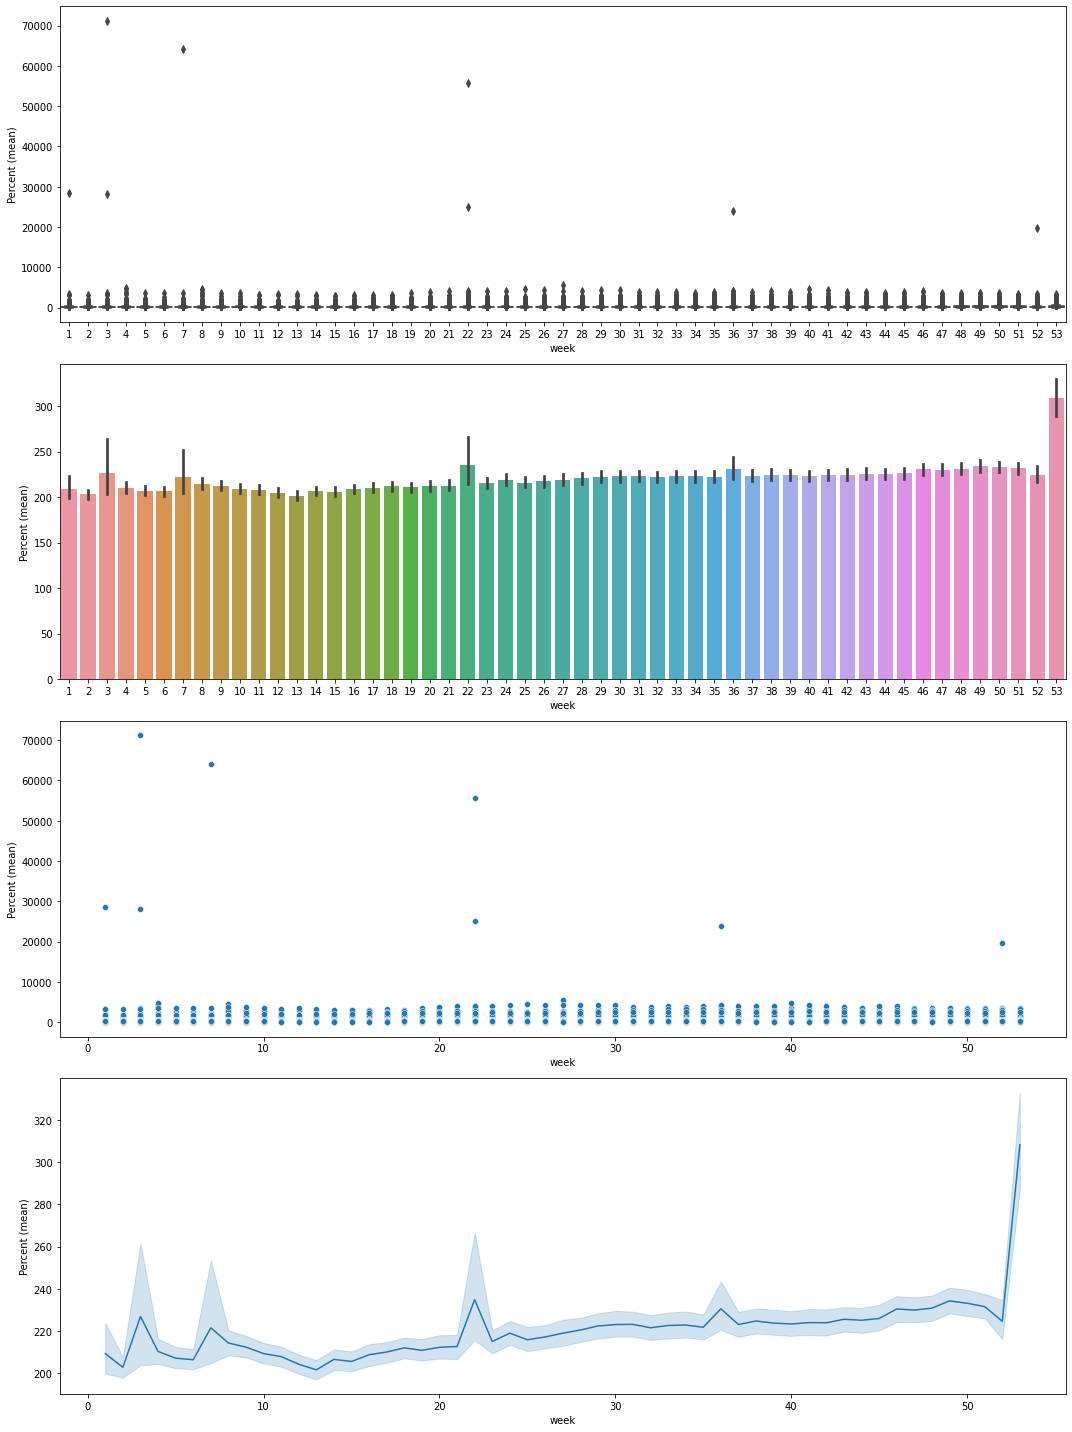

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a month

In [6]:
from analysis_base_first_date import get_best_month_day

df = get_best_month_day(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2010,12,31,EA,100.0
1,2011,1,3,EA,99.457504
2,2011,1,4,EA,98.79445
3,2011,1,5,EA,98.312232
4,2011,1,6,EA,98.251954
...,...,...,...,...,...
1210794,2020,12,24,NUE,119.476409
1210795,2020,12,28,NUE,118.709088
1210796,2020,12,29,NUE,117.828927
1210797,2020,12,30,NUE,116.926201


     Percent (mean)
day                
1        215.527958
2        218.140038
3        216.986208
4        216.873947
5        217.863106


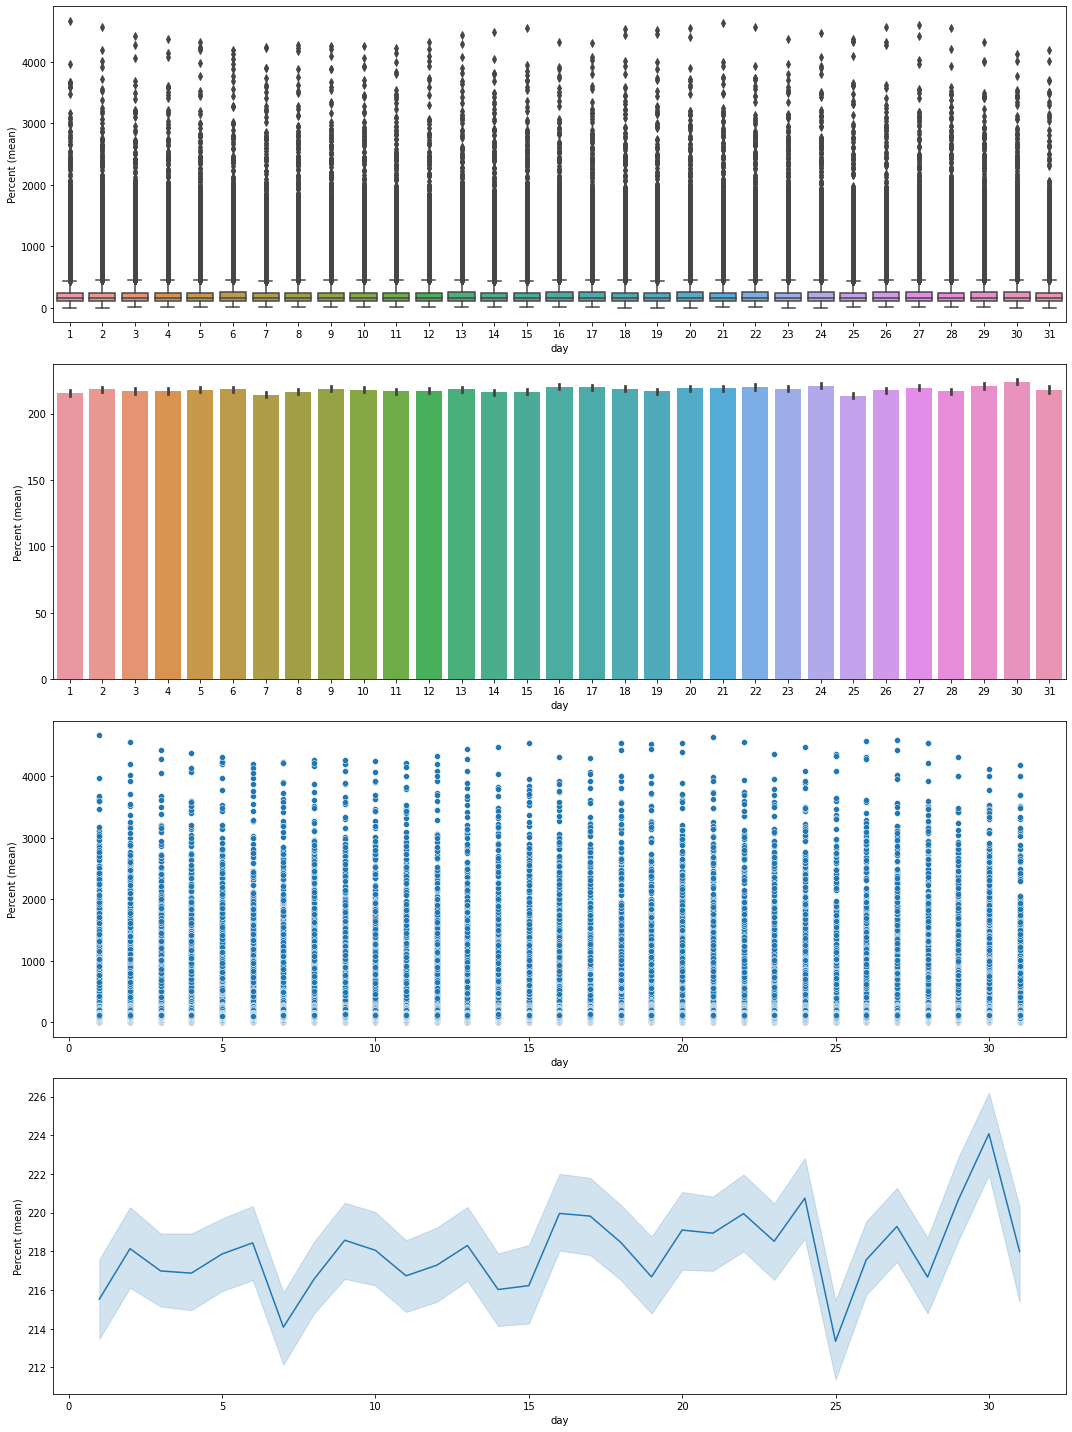

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [8]:
from analysis_base_first_date import get_best_weekday


df = get_best_weekday(FILENAME, YahooRange.YEARS_10, limit=LIMIT)

df

,year,week,weekday,Percent (mean)
0,2010,52,4,100.0
1,2011,1,0,99.457504
2,2011,1,1,98.79445
3,2011,1,2,98.312232
4,2011,1,3,98.251954
...,...,...,...,...
1210794,2020,52,3,119.476409
1210795,2020,53,0,118.709088
1210796,2020,53,1,117.828927
1210797,2020,53,2,116.926201


         Percent (mean)
weekday                
0            218.689408
1            218.283829
2            217.715369
3            217.818413
4            217.424899


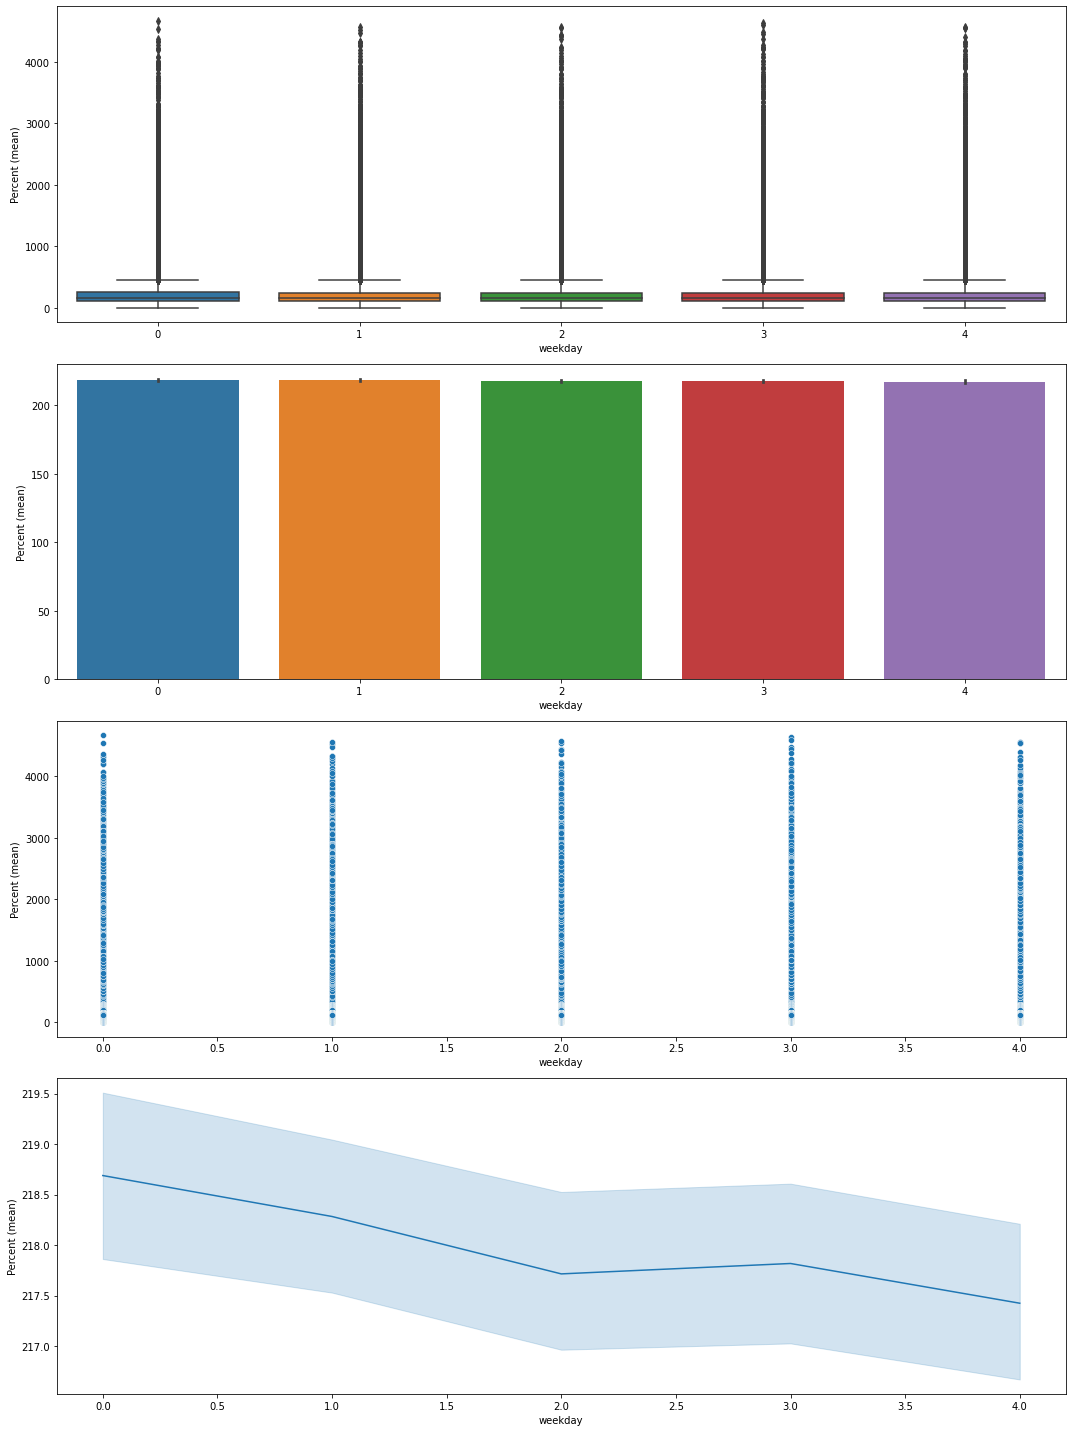

In [9]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Hourly stock price fluctuations within a day

In [10]:
from analysis_base_first_date import get_best_hour

df = get_best_hour(FILENAME, YahooRange.YEARS_2, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2020,14,3,9,OTIS,100.0
1,2020,14,3,10,OTIS,99.065634
2,2020,14,3,11,OTIS,104.238834
3,2020,14,3,12,OTIS,106.494983
4,2020,14,3,13,OTIS,111.109845
...,...,...,...,...,...,...
5411,2020,53,31,12,CARR,269.927533
5412,2020,53,31,13,CARR,270.79709
5413,2020,53,31,14,CARR,270.79709
5414,2020,53,31,15,CARR,272.934785


      Percent (mean)
hour                
9         136.924169
10        137.259433
11        137.208177
12        136.972414
13        137.473135


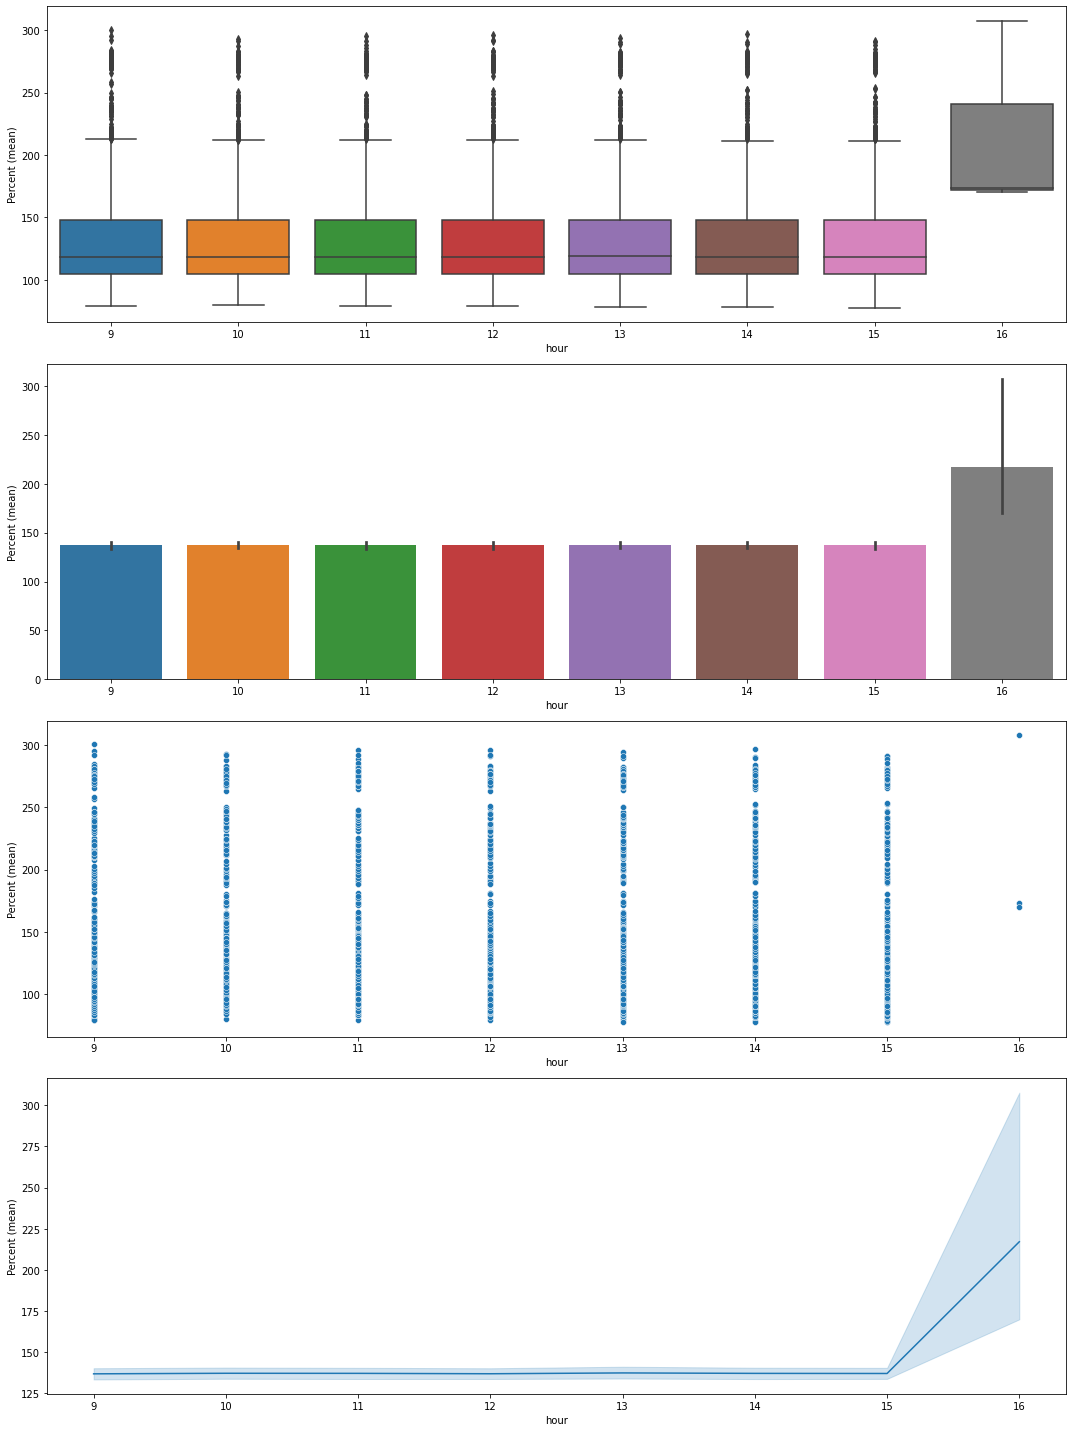

In [11]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within an day

In [12]:
from analysis_base_first_date import get_best_time

df = get_best_time(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

[*********************100%***********************]  505 of 505 completed

8 Failed downloads:
- NBL: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CTL: No data found, symbol may be delisted
- TIF: No data found, symbol may be delisted
- CXO: No data found, symbol may be delisted
- ETFC: No data found, symbol may be delisted
- MYL: No data found, symbol may be delisted


,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,17,9,30,9.5,GPN,100.0
1,2021,11,17,9,45,9.75,GPN,100.050962
2,2021,11,17,10,0,10.0,GPN,99.902694
3,2021,11,17,10,15,10.25,GPN,99.888794
4,2021,11,17,10,30,10.5,GPN,99.990731
...,...,...,...,...,...,...,...,...
511660,2021,19,12,14,45,14.75,RHI,115.898912
511661,2021,19,12,15,0,15.0,RHI,116.063429
511662,2021,19,12,15,15,15.25,RHI,115.727818
511663,2021,19,12,15,30,15.5,RHI,115.254009


       Percent (mean)
time                 
9.50       103.049293
9.75       103.058744
10.00      103.068337
10.25      103.060294
10.50      103.059227


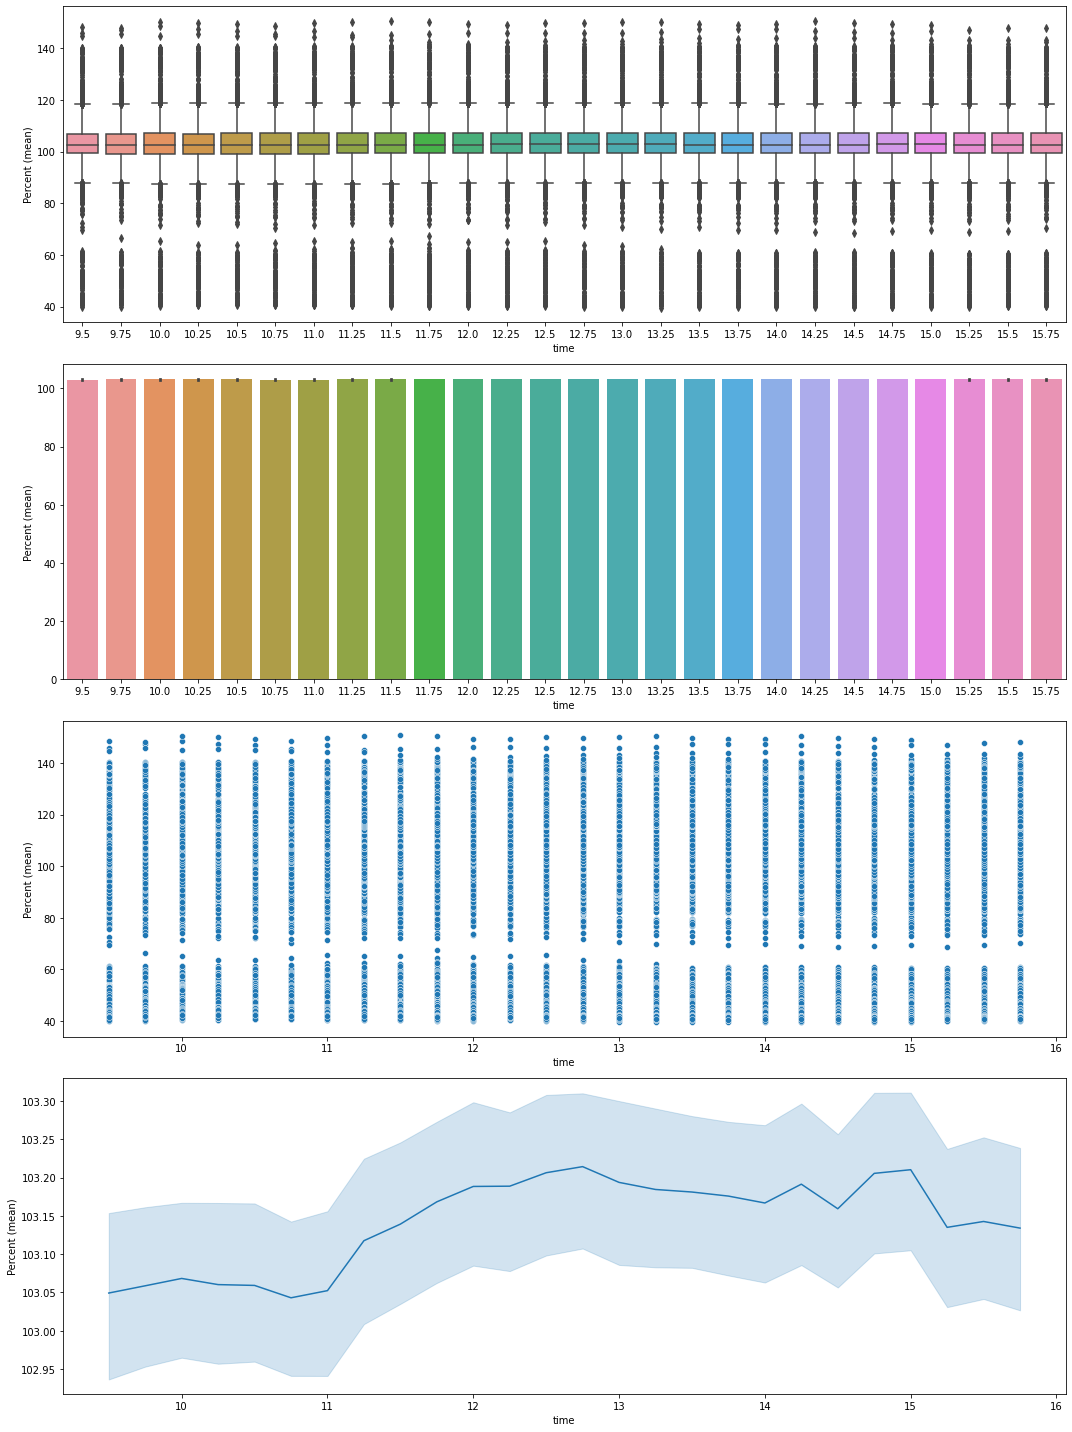

In [13]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [14]:
from analysis_base_first_date import get_best_quarter

df = get_best_quarter(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,17,9,30,30,GPN,100.0
1,2021,11,17,9,45,45,GPN,100.050962
2,2021,11,17,10,0,0,GPN,99.902694
3,2021,11,17,10,15,15,GPN,99.888794
4,2021,11,17,10,30,30,GPN,99.990731
...,...,...,...,...,...,...,...,...
511660,2021,19,12,14,45,45,RHI,115.898912
511661,2021,19,12,15,0,0,RHI,116.063429
511662,2021,19,12,15,15,15,RHI,115.727818
511663,2021,19,12,15,30,30,RHI,115.254009


         Percent (mean)
quarter                
0            103.146544
15           103.146221
30           103.133696
45           103.142677


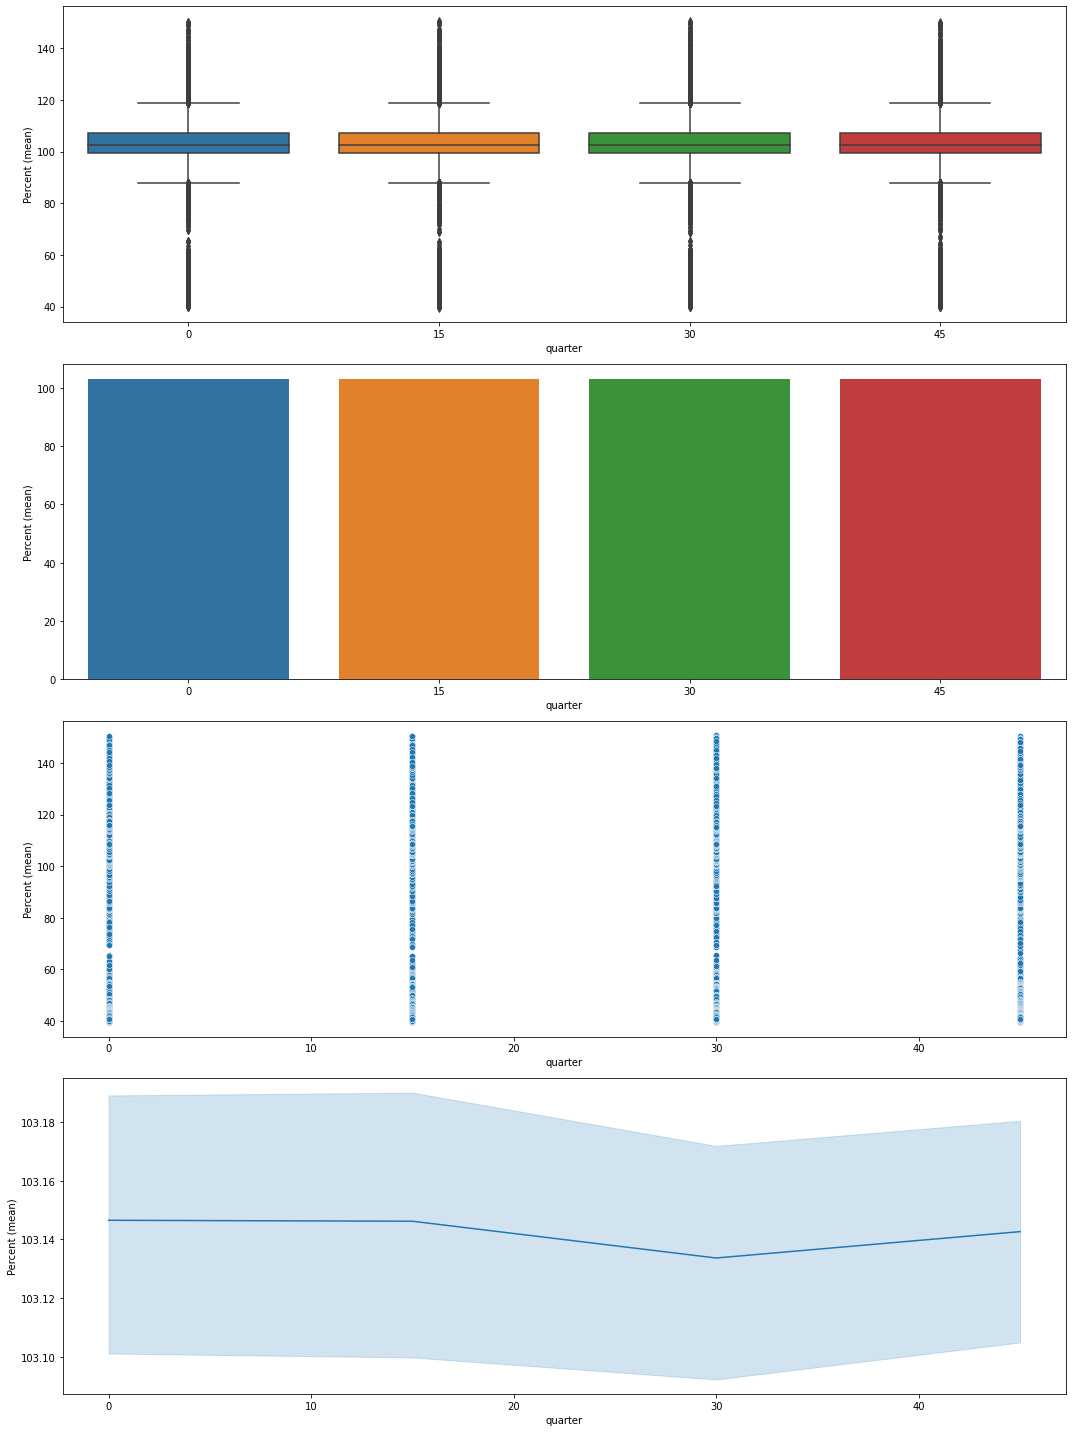

In [15]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)